In [4]:
%matplotlib inline


Image interpolation
=====================

The example demonstrates image interpolation on a Racoon face.



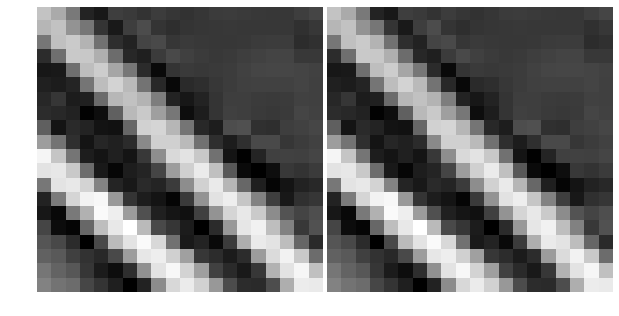

In [6]:
import scipy.misc
import matplotlib.pyplot as plt

f = scipy.misc.face(gray=True)

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='nearest')#bicubic ,nearest
plt.axis('off')

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=1)
plt.show()


C:\Users\josh\Anaconda3\envs\Tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


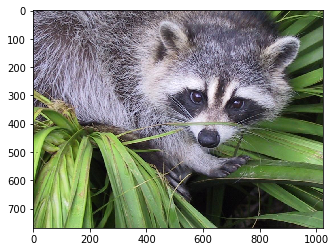

In [25]:
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

In [34]:
from PIL import Image
im = Image.open("Resize.jpg").convert("RGB")
im.size

(256, 256)

Image.open info = <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x1AD4BA573C8>


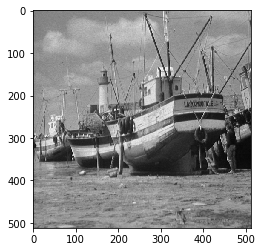

(128, 128, 3)
uint8
49152
128 128
<class 'PIL.Image.Image'>
<class 'numpy.ndarray'>
redImg.shape= (128, 128)


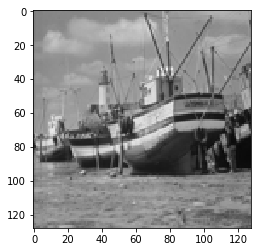

g.Bicubic [126.        125.90625   125.75      125.71875   126.        126.859375
 128.125     129.328125  130.        129.875     129.25      128.5
 128.        127.8125    127.75      127.8125    128.        128.3359375
 128.8125    129.3828125]
rgbLable.Bicubic int32 [126 125 125 125 126 126 128 129 130 129 129 128 128 127 127 127 128 128
 128 129]


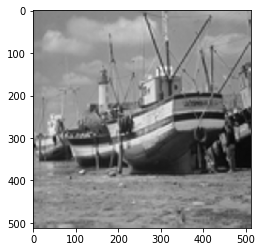

rgbLable2.info int32 [126 125 125 125 126 126 128 129 130 129 129 128 128 127 127 127 128 128
 128 129]
original.info uint8 (512, 512) [127 123 125 120 126 123 127 128 125 129 129 132 129 132 127 120 121 126
 129 131]
contrast.info int32 (512, 512) [126 125 125 125 126 126 128 129 130 129 129 128 128 127 127 127 128 128
 128 129]
error.info int32 (512, 512) [ 1  4  0 25  0  9  1  1 25  0  0 16  1 25  0 49 49  4  1  4]
Errors:  83228756
mse 0.000781280450713453
PSNR -31.071930425194168


In [48]:
import tensorflow as tf

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc
import math


# #PSNR  
def psnr(original, contrast):
    print("original.info",original.dtype,original.shape,original[0,0:20])
    print("contrast.info",contrast.dtype,contrast.shape,contrast[0,0:20])
    
#     im1=original.reshape(262144,1)
#     im2=contrast.reshape(262144,1)
#     print ("len",len(im1))
#     error = []
#     for i in range(len(im1)):
#         error.append(im1[i,0]-im2[i,0])
    
    error=np.zeros((len(original[0]),len(original[1])),dtype=int) # uint8'
    #error = []
    for i in range(len(original[0])):
        for j in range(len(original[1])):
            #error.append((original[i,j] - contrast[i,j]))
            error[i,j]=(original[i,j] - contrast[i,j])**2
    mse=np.sum(error)
    print("error.info",error.dtype,error.shape,error[0,0:20])
    print("Errors: ",mse)
    print("mse",255**2/mse)

    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    #return (20 * math.log10(PIXEL_MAX**2/mse))
    return (20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))



def sw( w1 ):
 w=abs(w1)
 a=-0.5
 if w < 1 and w >= 0:
     A=1-(a+3)*w**2+(a+2)*w**3;
     
 elif w >= 1 and w < 2:
     A=a*w**3-5*a*w**2+(8*a)*w-4*a
    
 else:
    A=0    
 return A



im = Image.open( "boat.png" )
print ("Image.open info =",im)
imgo=np.array(im)  #打开图像并转化为数字矩阵

plt.figure("boat.png")
plt.imshow(im)
plt.axis('on')
plt.show()
#Resize image  weight high
resize_image = im.resize( (128, 128), Image.BICUBIC ) # BILINEAR
# resize_image.save( "picture/Resize.jpg")
resize_image.save( "ResBoat.png")


im2 = Image.open("ResBoat.png").convert("RGB")   #  模式“L”  灰色图像   RGB
img=np.array(im2)

print (img.shape)
print (img.dtype )
print (img.size )
print(im2.size[0],im2.size[1] )

print (type(im2))
print (type(img))

k=4
# [m,n,color]=img.shape
[m,n,color]=img.shape
f=np.zeros((m,n),dtype=float ) #  float
# print("color.shape=",color)

# redImg= img[:,:,2]  #
redImg= img[:,:,0]  #
print("redImg.shape=",redImg.shape)

plt.figure("K=")
plt.imshow(im2) # redImg
plt.show()



# 上部 & 下部 增列2 row
T_1=redImg[0,:]
T=np.append( T_1, T_1 )
D_1=redImg[m-1,:]
D=np.append( D_1, D_1 )
# T=T.reshape((2,n))
# D=D.reshape((2,n))
# print ("T.shape=",T.shape,T)
# print ("D.shape=",D.shape,D)

# 左部 增列2 Col
L_1=np.array( [redImg[0,0], redImg[0,0]] )
L_2=redImg[:,0]
L_3=np.array( [redImg[m-1,0], redImg[m-1,0]] )
L_12=np.append(L_1,L_2)
L_4=np.append(L_12,L_3)
# print ("L_4.shape=",L_4.shape,L_4)
L=np.append(L_4,L_4)
# print ("L.shape=",L.shape,L)
L=L.reshape((2,m+4))
L=L.T
# print ("L.shape=",L.shape,L)

# 右部 增列2 Col
R_1=np.array( [redImg[0,n-1], redImg[0,n-1]] )
R_2=redImg[:,n-1]
R_3=np.array( [redImg[m-1,n-1], redImg[m-1,n-1]] )
R_12=np.append(R_1,R_2)
R_4=np.append(R_12,R_3)
R=np.append(R_4,R_4)
R=R.reshape(2,m+4)
R=R.T
# print ("R.shape=",R.shape,R)

#  合成 上中下部 增列 4 Row
h_col1=np.append(T,redImg)
h_col2=np.append(h_col1,D)
h_col=h_col2.reshape((m+4,n))
# print ("h_col.shape=",h_col.shape)
# print ("h_col2.shape=",h_col2.shape)
# print ("h_col.shape=",h_col.shape,h_col)

#  合成 左中右部 增列 4 Col
newMap = np.concatenate((L, h_col , R), axis=1)
# print ("newMap.shape=",newMap.shape)
# print ("[:,0].shape=",newMap[:,0].shape,newMap[:,0])
# print ("[:,1].shape=",newMap[:,1].shape,newMap[:,1])
# print ("[:,2].shape=",newMap[:,2].shape,newMap[:,2])

# print ("[:,n+3].shape=",newMap[:,n+3].shape,newMap[:,n+3])
# print ("[:,n+2].shape=",newMap[:,n+2].shape,newMap[:,n+2])
# print ("[:,n+1].shape=",newMap[:,n+1].shape,newMap[:,n+1])

# fnewMap=newMap.reshape((1,41616))
                       
fnewMap=newMap.astype(float)
# print ("fnewMap.shape=",fnewMap.shape)


g=np.zeros((m*k,n*k))
# print("rgbLable.zeros",rgbLable[0,0:20])

for x in range(k*m):
    u=(x%k)/k ; # 取餘數後再除以K
    x1=x//k+2 
    A=np.array( [sw(1+u) ,sw(u) ,sw(1-u) ,sw(2-u)])
    for y in range(k*n):
        v=(y%k)/k ; y1=(y//k)+2; 
        C=np.array([[sw(1+v)],[sw(v)],[sw(1-v)],[sw(2-v)]])
        
        B=np.array([[fnewMap[x1-1,y1-1]  ,  fnewMap[x1-1,y1]  ,  fnewMap[x1-1,y1+1]  ,   fnewMap[x1-1,y1+2] ],
                    [fnewMap[x1  ,y1-1]  ,  fnewMap[x1 , y1]  ,  fnewMap[x1,  y1+1]  ,   fnewMap[x1,  y1+2] ],
                    [fnewMap[x1+1,y1-1]  ,  fnewMap[x1+1,y1]  ,  fnewMap[x1+1,y1+1]  ,   fnewMap[x1+1,y1+2] ],
                    [fnewMap[x1+2,y1-1]  ,  fnewMap[x1+2,y1]  ,  fnewMap[x1+2,y1+1]  ,   fnewMap[x1+2,y1+2] ]] );
        g1=np.dot(A,B)
        g2=np.dot(g1,C)
        g[x,y]=g2

# print("rgbLable.shape",rgbLable.shape,rgbLable)
# print("A",A.shape,A)
# print("B",B.shape,B)
# print("C",C.shape,C)
# g2=(A*B*C)
# print("g2.shape",g2.shape,g2) 
print("g.Bicubic",g[0,0:20])
rgbLable=g.astype(int) # 'uint8'

# rgbLable=oct(rLable)

print("rgbLable.Bicubic",rgbLable.dtype,rgbLable[0,0:20])
plt.figure("K=")
# rgbLable.save( "InterBoat.jpg")

# np.save('InterBoat.png',rgbLable)
# im.save( "InterBoat.png", "PNG" )
PIL=Image.fromarray(rgbLable )
PIL.save( "InterBoat.png", "PNG" )
plt.imshow(PIL)
plt.show()


im4 = Image.open( "InterBoat.png" )
rgbLable2=np.array(im4)  #打开图像并转化为数字矩阵
rgbLable2=rgbLable2.astype(int) # 'uint8'
print("rgbLable2.info",rgbLable2.dtype,rgbLable2[0,0:20])

# psnr(original, contrast):
# imgo.dtype = 'int'
# rgbLable.dtype = 'int'

d=psnr(imgo,rgbLable2)
print("PSNR",d)
        
        
# PSNR值(峰值信號雜訊比 (Peak Signal to Noise Ratio))

def psnrg(original, contrast):
    error = []
    for i in range(len(original[0])):
        for j in range(len(original[1])):
            error.append((original[i,j] - contrast[i,j])**2)
    mse=np.sum(error)
    print("Errors: ", mse)
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return #(20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))








In [101]:
u=(5%2)/2
print(u)

0.5


In [104]:
11.9//3+2


5.0

In [124]:
 w=abs(.06);
if w < 1 and w >= 0:
    print("w < 1 and w >= 0")

w < 1 and w >= 0


In [9]:
def sw( w1 ):
 w=abs(w1)
 a=-0.5
 if w < 1 and w >= 0:
     A=1-(a+3)*w**2+(a+2)*w**3;
    
 elif w >= 1 and w < 2:
     A=a*w**3-5*a*w**2+(8*a)*w-4*a
    
 else:
    A=0    
 return A


print(sw(1.6))


-0.04800000000000004


In [48]:
g2=1.2
Lable=np.zeros((3,2))

#x=1 ;y=1 ;
for i in range(3):
  for j in range(2):
      print (i,j)
      Lable[i,j]=g2  
    
print (Lable.shape,Lable)

0 0
0 1
1 0
1 1
2 0
2 1
(3, 2) [[1.2 1.2]
 [1.2 1.2]
 [1.2 1.2]]


In [112]:
C = np.arange(1,4)
print ("C",C)
E = np.arange(0,3)
print ("E",E)

D = np.arange(0,9).reshape(3,3)
print ("D",D)

F=np.arange(2,5).reshape(3,1)
print ("F",F.shape,F)

np.dot(C,D)
# np.sun(np.dot(C,D))

C [1 2 3]
E [0 1 2]
D [[0 1 2]
 [3 4 5]
 [6 7 8]]
F (3, 1) [[2]
 [3]
 [4]]


array([24, 30, 36])

In [231]:




def psnrww(img1, img2):
    mse = numpy.mean( (img1 - img2) ** 2 )
    if mse == 0:
    return 100
    PIXEL_MAX = 255.0
    return 20 * math.log10(PIXEL_MAX / math.sqrt(mse))

d=psnr(original,contrast)
print(d)


IndentationError: expected an indented block (<ipython-input-231-74fa79c8778d>, line 8)

original.info uint8 [127 123 125 120 126 123 127 128 125 129 129 132 129 132 127 120 121 126
 129 131]
contrast.info int32 [126 125 125 125 126 126 128 129 130 129 129 128 128 127 127 127 128 128
 128 129]
Image.open info = <PIL.PngImagePlugin.PngImageFile image mode=L size=512x512 at 0x1AD4871AA20>
Image2.open info = <PIL.PngImagePlugin.PngImageFile image mode=I size=512x512 at 0x1AD4871A9B0>


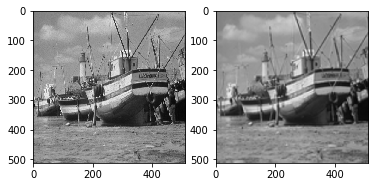

error.info int32 (512, 512) [ 1  4  0 25  0  9  1  1 25  0  0 16  1 25  0 49 49  4  1  4]
255**2 & mse:  65025 317.4925079345703
Errors 204.80798247182742
psnr 23.113468794322444


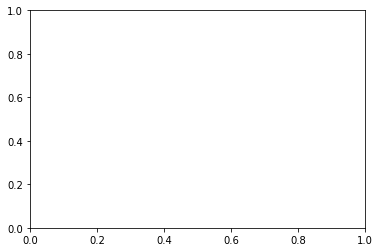

In [52]:

#PSNR  灰階
def psnr(original, contrast):
    
    #error = []
    error=np.zeros((len(original[0]),len(original[1])),dtype=int) # uint8'
    
    for i in range(len(original[0])):
        for j in range(len(original[1])):
            #error.append((original[i,j] - contrast[i,j])**2)
            error[i,j]=(original[i,j] - contrast[i,j])**2
            
    mse=np.sum(error)/original.size
    
    # print("error.info",error[0,0:20])
    
    print("error.info",error.dtype,error.shape,error[0,0:20])
    print("255**2 & mse: ",255**2 ,mse)
    print("Errors",255**2/mse)
    
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return (20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))


import math
im = Image.open( "boat.png" )
original=np.array(im)  #打开图像并转化为数字矩阵
print("original.info",original.dtype,original[0,0:20])

im2 = Image.open( "InterBoat.png" )
contrast=np.array(im2)  #打开图像并转化为数字矩阵
# contrast=contrast.astype(int) # 'uint8'
print("contrast.info",contrast.dtype,contrast[0,0:20])


print ("Image.open info =",im)
print ("Image2.open info =",im2)
fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.show()
plt.axis('on')


d=psnr(original,contrast)
print("psnr",d)


In [282]:
from numpy import *;
a1=array([[1,2,3],[5,2,4]]);
a1=mat(a1);

# a1=mat([1,1]);
a2=mat([[2,2,5],[0,2,3]]);
print(a1,a2)

a3=multiply(a1,a2);
print("a3",a3)

[[1 2 3]
 [5 2 4]] [[2 2 5]
 [0 2 3]]
a3 [[ 2  4 15]
 [ 0  4 12]]


original.info 128 uint8 [[99 86 40]
 [83 71 38]]
contrast.shape 64 64 3
resize_image.info 128 uint8 [[95 83 42]
 [95 84 43]]
0.5789998372395834
99
[]
Image.open shape = 128 128 3 128
Image.open info = <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x2645099B400>
Image2.open info = <PIL.PngImagePlugin.PngImageFile image mode=RGB size=64x64 at 0x2645099B358>
Image3.open info = <PIL.PngImagePlugin.PngImageFile image mode=RGB size=128x128 at 0x2645099B4E0>


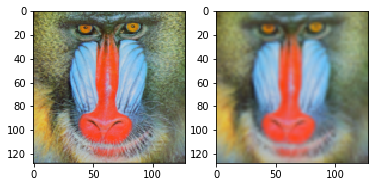

[width,height,color]= 128 128 3
error.info int32 (128, 128, 3) [[ 16   9   4]
 [144 169  25]
 [100  36   1]
 [ 49 196  81]
 [ 81  25   9]]
original[0,0:5] (128, 128, 3) [[ 99  86  40]
 [ 83  71  38]
 [ 84  79  46]
 [ 86  72  38]
 [102  92  46]]
contrast[0,0:5] (128, 128, 3) [[95 83 42]
 [95 84 43]
 [94 85 45]
 [93 86 47]
 [93 87 49]]
original[0:5]-contrast[0:5] [[  4   3  -2]
 [-12 -13  -5]
 [-10  -6   1]
 [ -7 -14  -9]
 [  9   5  -3]]
np.sum(error).info= 6117906 /width*height*color=  49152
255**2 & mse:  65025 & 124.4691162109375
255**2/mse 522.4187491602519
psnr 27.18018755002698


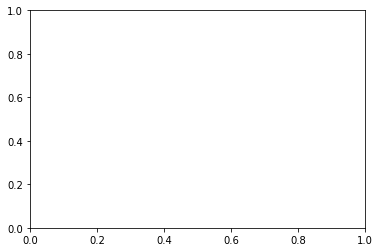

In [66]:
#PSNR  彩色RGB

def psnr(original, contrast):
    
    [width,height,color]=original.shape
    #error = []
    error=np.zeros((width,height,color),dtype=int) # uint8'
    # error=np.zeros((original.shape[0],original.shape[1],original.shape[2]),dtype=int) # uint8'
    # error==np.empty(shape=[0, 3])
    print("[width,height,color]=",width,height,color)
#     error=(original[0,0:width]-contrast[0,0:width])**2
    error=(original[0:width,0:height,0:color]-contrast[0:width,0:height,0:color]) #**2

    print("error.info",error.dtype,error.shape,error[0,0:5])
#     print("error.info All",error)
    
    print("original[0,0:5]",original.shape,original[0,0:5])
    print("contrast[0,0:5]",contrast.shape,contrast[0,0:5])
    print("original[0:5]-contrast[0:5]",original[0,0:5]-contrast[0,0:5])
    
    
    print("np.sum(error).info=",np.sum(error),"/width*height*color= ",width*height*color)
    mse=np.sum(error)/(width*height*color)
    
    
    
#     for i in range(width):
#         for j in range(height):
#             # error.append((original[i,j] - contrast[i,j])**2)
#             # error[i,j]=(original[i,j] - contrast[i,j])**2
#             error[i,j]=(original[i,j] - contrast[i,j])**2
            
            
#     mse=np.sum(error)/original.size
    # print("error.info",error[0,0:20])
    
    print("255**2 & mse: ",255**2 ,"&",mse)
    print("255**2/mse",255**2/mse)
    
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return (20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))


# def psnr2(original, contrast):
# m=2
# n=3
# xyLable=np.empty(shape=[0, m])
# rgbLable=np.empty(shape=[0, n])
# nom=255

# for x in range(width):
#     for y in range(height):
#         r, g, b = pix[x, y]
#         xy = np.array([[x, y]], np.int)
#         rgb = np.array([[r, g , b]], np.int)

#         xyLable =np.vstack((xyLable, xy))
#         rgbLable=np.vstack((rgbLable, rgb))
# #        print(x)




import math
im = Image.open( "ResizeD4.png" )
original=np.array(im)  #打开图像并转化为数字矩阵

print("original.info",original.shape[0],original.dtype,original[0,0:2])

# im2 = Image.open( "InterBaboonE10k_D4.png" )
im2 = Image.open( "ResizeD2.png" )
contrast=np.array(im2)  #打开图像并转化为数字矩阵

k=1
[width,height,colors]=contrast.shape
print("contrast.shape",width,height,colors)
resize_image = im2.resize((widthA*k, heightA*k), Image.BILINEAR)
#resize_image = im2.resize((widthA//k, heightA//k), Image.BICUBIC)

resize_image.save("ResizeD128.png")  # 256

im3 = Image.open( "ResizeD128.png" )
resize_image=np.array(im3)  #打开图像并转化为数字矩阵
# print(resize_image[0,0:2])

# contrast=contrast.astype(int) # 'uint8'
# print("contrast.info",resize_image.dtype,resize_image[0,0:2])
print("resize_image.info",resize_image.shape[0],resize_image.dtype,resize_image[0,0:2])

[widthA,heightA,color]=original.shape

# a=(original[0,0:128]-contrast[0,0:128])**2
a=(original[0,0:128]-resize_image[0,0:128])**2
b=np.sum(a)/(widthA*heightA*color)

print(b)
print(original[0,0,0])
# print(original[0,500:513]-contrast[0,500:513])
print(original[0,500:513]-resize_image[0,500:513])

print ("Image.open shape =",widthA,heightA,color,original.shape[0])
print ("Image.open info =",im)
print ("Image2.open info =",im2)
print ("Image3.open info =",im3)

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(im3)
plt.show()
plt.axis('on')

resize_image=resize_image.astype(int)
d=psnr(original,resize_image)
print("psnr",d)


In [57]:
v=17
x=2
v//x
width=8
height=8

for x in range(width*k):
    for y in range(height*k):
#         xinp = x + (x % k) / k
        yinp =y//k+(y % k)/ k
        print("yinp",x,y,"="   ,yinp)

yinp 0 0 = 0.0
yinp 0 1 = 0.5
yinp 0 2 = 1.0
yinp 0 3 = 1.5
yinp 0 4 = 2.0
yinp 0 5 = 2.5
yinp 0 6 = 3.0
yinp 0 7 = 3.5
yinp 0 8 = 4.0
yinp 0 9 = 4.5
yinp 0 10 = 5.0
yinp 0 11 = 5.5
yinp 0 12 = 6.0
yinp 0 13 = 6.5
yinp 0 14 = 7.0
yinp 0 15 = 7.5
yinp 1 0 = 0.0
yinp 1 1 = 0.5
yinp 1 2 = 1.0
yinp 1 3 = 1.5
yinp 1 4 = 2.0
yinp 1 5 = 2.5
yinp 1 6 = 3.0
yinp 1 7 = 3.5
yinp 1 8 = 4.0
yinp 1 9 = 4.5
yinp 1 10 = 5.0
yinp 1 11 = 5.5
yinp 1 12 = 6.0
yinp 1 13 = 6.5
yinp 1 14 = 7.0
yinp 1 15 = 7.5
yinp 2 0 = 0.0
yinp 2 1 = 0.5
yinp 2 2 = 1.0
yinp 2 3 = 1.5
yinp 2 4 = 2.0
yinp 2 5 = 2.5
yinp 2 6 = 3.0
yinp 2 7 = 3.5
yinp 2 8 = 4.0
yinp 2 9 = 4.5
yinp 2 10 = 5.0
yinp 2 11 = 5.5
yinp 2 12 = 6.0
yinp 2 13 = 6.5
yinp 2 14 = 7.0
yinp 2 15 = 7.5
yinp 3 0 = 0.0
yinp 3 1 = 0.5
yinp 3 2 = 1.0
yinp 3 3 = 1.5
yinp 3 4 = 2.0
yinp 3 5 = 2.5
yinp 3 6 = 3.0
yinp 3 7 = 3.5
yinp 3 8 = 4.0
yinp 3 9 = 4.5
yinp 3 10 = 5.0
yinp 3 11 = 5.5
yinp 3 12 = 6.0
yinp 3 13 = 6.5
yinp 3 14 = 7.0
yinp 3 15 = 7.5
yinp 4 0 = 0.0
y

In [58]:
v=17.12
x=1
v//x

17.0

imAll.shape1=  512 512
imAll.shape2=  (512, 512, 3)
imog.shape=  256 256
Resize.jpg= k  2 128 128


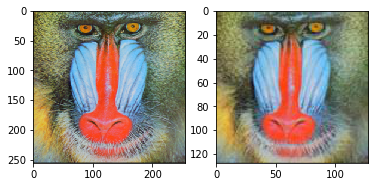

xyLable.shape (16384, 2)
rgbLable.shape (16384, 3)
xyLable[0:3]= [[0. 0.]
 [0. 1.]
 [0. 2.]]
rgbLable[0:3]= [[ 90.  83.  41.]
 [100.  93.  51.]
 [ 81.  74.  30.]]
x_train.shape,y_train.shape)=  (16384, 2) (16384, 3)
x_test.shape,y_test.shape)=  (0, 2) (0, 3)
16384 = X train samples
0 = X test samples
(16384, 3) y train samples
x_train[:3] = [[ 28.  26.]
 [115. 104.]
 [ 37.  97.]]
y_train[:3] = [[0.4509804  0.49411765 0.43137255]
 [0.43529412 0.45490196 0.3764706 ]
 [0.41568628 0.28235295 0.34509805]]
len(y_train)=  16384
(16384, 3) categorical after
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 10)                30        
_________________________________________________________________
dropout_111 (Dropout)        (None, 10)                0         
_________________________________________________________________
dense_277 (Dense)            (None, 10)         

16384/16384 [==============================] - 0s 18us/step - loss: 0.0308 - acc: 0.5176 - val_loss: 0.0295 - val_acc: 0.6006
Epoch 105/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0307 - acc: 0.5188 - val_loss: 0.0295 - val_acc: 0.5953
Epoch 106/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0309 - acc: 0.5175 - val_loss: 0.0294 - val_acc: 0.6016
Epoch 107/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0307 - acc: 0.5195 - val_loss: 0.0294 - val_acc: 0.5995
Epoch 108/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0305 - acc: 0.5204 - val_loss: 0.0296 - val_acc: 0.5875
Epoch 109/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0306 - acc: 0.5217 - val_loss: 0.0293 - val_acc: 0.5925
Epoch 110/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0307 - acc: 0.5136 - val_loss: 0.0293 - val_acc: 0.5989
Epoch 111/5000
16384/16384 [

Epoch 162/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0293 - acc: 0.5327 - val_loss: 0.0280 - val_acc: 0.5855
Epoch 163/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0293 - acc: 0.5357 - val_loss: 0.0280 - val_acc: 0.5840
Epoch 164/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0293 - acc: 0.5413 - val_loss: 0.0280 - val_acc: 0.5801
Epoch 165/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0293 - acc: 0.5302 - val_loss: 0.0282 - val_acc: 0.5750
Epoch 166/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0293 - acc: 0.5395 - val_loss: 0.0281 - val_acc: 0.5641
Epoch 167/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0292 - acc: 0.5412 - val_loss: 0.0280 - val_acc: 0.5766
Epoch 168/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0292 - acc: 0.5388 - val_loss: 0.0287 - val_acc: 0.5537
Epoch 169/500

16384/16384 [==============================] - 0s 18us/step - loss: 0.0281 - acc: 0.5852 - val_loss: 0.0271 - val_acc: 0.5960
Epoch 221/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0279 - acc: 0.5939 - val_loss: 0.0275 - val_acc: 0.5869
Epoch 222/5000
16384/16384 [==============================] - 0s 21us/step - loss: 0.0279 - acc: 0.5939 - val_loss: 0.0269 - val_acc: 0.6000
Epoch 223/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0279 - acc: 0.5841 - val_loss: 0.0268 - val_acc: 0.5963
Epoch 224/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0277 - acc: 0.5899 - val_loss: 0.0269 - val_acc: 0.6046
Epoch 225/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0278 - acc: 0.5937 - val_loss: 0.0269 - val_acc: 0.5953
Epoch 226/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0278 - acc: 0.5957 - val_loss: 0.0266 - val_acc: 0.5976
Epoch 227/5000
16384/16384 [

16384/16384 [==============================] - 0s 19us/step - loss: 0.0259 - acc: 0.5993 - val_loss: 0.0256 - val_acc: 0.5939
Epoch 337/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0262 - acc: 0.5956 - val_loss: 0.0263 - val_acc: 0.5870
Epoch 338/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0260 - acc: 0.5996 - val_loss: 0.0251 - val_acc: 0.5997
Epoch 339/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0259 - acc: 0.5952 - val_loss: 0.0261 - val_acc: 0.5914
Epoch 340/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0259 - acc: 0.5964 - val_loss: 0.0260 - val_acc: 0.5869
Epoch 341/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0260 - acc: 0.5969 - val_loss: 0.0267 - val_acc: 0.5860
Epoch 342/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0258 - acc: 0.5974 - val_loss: 0.0252 - val_acc: 0.5991
Epoch 343/5000
16384/16384 [

16384/16384 [==============================] - 0s 18us/step - loss: 0.0246 - acc: 0.6118 - val_loss: 0.0252 - val_acc: 0.6135
Epoch 453/5000
16384/16384 [==============================] - 0s 21us/step - loss: 0.0245 - acc: 0.6193 - val_loss: 0.0271 - val_acc: 0.5840
Epoch 454/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0247 - acc: 0.6096 - val_loss: 0.0258 - val_acc: 0.6090
Epoch 455/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0247 - acc: 0.6109 - val_loss: 0.0255 - val_acc: 0.6003
Epoch 456/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0242 - acc: 0.6169 - val_loss: 0.0255 - val_acc: 0.6055
Epoch 457/5000
16384/16384 [==============================] - 0s 22us/step - loss: 0.0245 - acc: 0.6130 - val_loss: 0.0257 - val_acc: 0.6070
Epoch 458/5000
16384/16384 [==============================] - 0s 25us/step - loss: 0.0244 - acc: 0.6127 - val_loss: 0.0249 - val_acc: 0.6108
Epoch 459/5000
16384/16384 [

Epoch 568/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0237 - acc: 0.6284 - val_loss: 0.0251 - val_acc: 0.6550
Epoch 569/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0237 - acc: 0.6262 - val_loss: 0.0256 - val_acc: 0.6436
Epoch 570/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0234 - acc: 0.6381 - val_loss: 0.0258 - val_acc: 0.6417
Epoch 571/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0236 - acc: 0.6321 - val_loss: 0.0252 - val_acc: 0.6506
Epoch 572/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0236 - acc: 0.6276 - val_loss: 0.0259 - val_acc: 0.6447
Epoch 573/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0236 - acc: 0.6286 - val_loss: 0.0256 - val_acc: 0.6540
Epoch 574/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0233 - acc: 0.6315 - val_loss: 0.0280 - val_acc: 0.6104
Epoch 575/500

16384/16384 [==============================] - 0s 17us/step - loss: 0.0231 - acc: 0.6442 - val_loss: 0.0246 - val_acc: 0.6601
Epoch 627/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0230 - acc: 0.6451 - val_loss: 0.0263 - val_acc: 0.6459
Epoch 628/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0233 - acc: 0.6393 - val_loss: 0.0260 - val_acc: 0.6475
Epoch 629/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0232 - acc: 0.6470 - val_loss: 0.0260 - val_acc: 0.6475
Epoch 630/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0230 - acc: 0.6437 - val_loss: 0.0249 - val_acc: 0.6594
Epoch 631/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0231 - acc: 0.6385 - val_loss: 0.0269 - val_acc: 0.6364
Epoch 632/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0230 - acc: 0.6463 - val_loss: 0.0264 - val_acc: 0.6461
Epoch 633/5000
16384/16384 [

16384/16384 [==============================] - 0s 18us/step - loss: 0.0224 - acc: 0.6588 - val_loss: 0.0264 - val_acc: 0.6227
Epoch 743/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0224 - acc: 0.6589 - val_loss: 0.0272 - val_acc: 0.6136
Epoch 744/5000
16384/16384 [==============================] - 0s 23us/step - loss: 0.0224 - acc: 0.6582 - val_loss: 0.0259 - val_acc: 0.6373
Epoch 745/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0225 - acc: 0.6588 - val_loss: 0.0275 - val_acc: 0.6114
Epoch 746/5000
16384/16384 [==============================] - 0s 22us/step - loss: 0.0224 - acc: 0.6591 - val_loss: 0.0262 - val_acc: 0.6249
Epoch 747/5000
16384/16384 [==============================] - 0s 21us/step - loss: 0.0222 - acc: 0.6550 - val_loss: 0.0278 - val_acc: 0.6050
Epoch 748/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0222 - acc: 0.6623 - val_loss: 0.0269 - val_acc: 0.6202
Epoch 749/5000
16384/16384 [

16384/16384 [==============================] - 0s 18us/step - loss: 0.0217 - acc: 0.6658 - val_loss: 0.0264 - val_acc: 0.6198
Epoch 859/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0217 - acc: 0.6696 - val_loss: 0.0297 - val_acc: 0.5847
Epoch 860/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0217 - acc: 0.6676 - val_loss: 0.0278 - val_acc: 0.6074
Epoch 861/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0217 - acc: 0.6688 - val_loss: 0.0281 - val_acc: 0.5985
Epoch 862/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0219 - acc: 0.6655 - val_loss: 0.0263 - val_acc: 0.6198
Epoch 863/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0217 - acc: 0.6647 - val_loss: 0.0286 - val_acc: 0.5983
Epoch 864/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0217 - acc: 0.6662 - val_loss: 0.0292 - val_acc: 0.5918
Epoch 865/5000
16384/16384 [

16384/16384 [==============================] - 0s 18us/step - loss: 0.0214 - acc: 0.6608 - val_loss: 0.0302 - val_acc: 0.5878
Epoch 975/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0212 - acc: 0.6658 - val_loss: 0.0306 - val_acc: 0.5868
Epoch 976/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0213 - acc: 0.6652 - val_loss: 0.0319 - val_acc: 0.5751
Epoch 977/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0211 - acc: 0.6691 - val_loss: 0.0308 - val_acc: 0.5863
Epoch 978/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0216 - acc: 0.6613 - val_loss: 0.0292 - val_acc: 0.6002
Epoch 979/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0212 - acc: 0.6652 - val_loss: 0.0302 - val_acc: 0.5891
Epoch 980/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0212 - acc: 0.6699 - val_loss: 0.0294 - val_acc: 0.6008
Epoch 981/5000
16384/16384 [

Epoch 1032/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0210 - acc: 0.6670 - val_loss: 0.0296 - val_acc: 0.6004
Epoch 1033/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0209 - acc: 0.6672 - val_loss: 0.0304 - val_acc: 0.5970
Epoch 1034/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0212 - acc: 0.6674 - val_loss: 0.0325 - val_acc: 0.5718
Epoch 1035/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0212 - acc: 0.6637 - val_loss: 0.0305 - val_acc: 0.5914
Epoch 1036/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0211 - acc: 0.6667 - val_loss: 0.0312 - val_acc: 0.5882
Epoch 1037/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0209 - acc: 0.6656 - val_loss: 0.0316 - val_acc: 0.5804
Epoch 1038/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0211 - acc: 0.6667 - val_loss: 0.0302 - val_acc: 0.5945
Epoch 

Epoch 1147/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0209 - acc: 0.6695 - val_loss: 0.0330 - val_acc: 0.5625
Epoch 1148/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0206 - acc: 0.6703 - val_loss: 0.0326 - val_acc: 0.5690
Epoch 1149/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0208 - acc: 0.6670 - val_loss: 0.0313 - val_acc: 0.5823
Epoch 1150/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0208 - acc: 0.6688 - val_loss: 0.0326 - val_acc: 0.5682
Epoch 1151/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0207 - acc: 0.6701 - val_loss: 0.0316 - val_acc: 0.5742
Epoch 1152/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0208 - acc: 0.6648 - val_loss: 0.0338 - val_acc: 0.5599
Epoch 1153/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0207 - acc: 0.6661 - val_loss: 0.0314 - val_acc: 0.5825
Epoch 

Epoch 1262/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0204 - acc: 0.6683 - val_loss: 0.0333 - val_acc: 0.5752
Epoch 1263/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6705 - val_loss: 0.0339 - val_acc: 0.5729
Epoch 1264/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0207 - acc: 0.6606 - val_loss: 0.0349 - val_acc: 0.5652
Epoch 1265/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0204 - acc: 0.6645 - val_loss: 0.0339 - val_acc: 0.5715
Epoch 1266/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0207 - acc: 0.6622 - val_loss: 0.0329 - val_acc: 0.5765
Epoch 1267/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0202 - acc: 0.6701 - val_loss: 0.0335 - val_acc: 0.5750
Epoch 1268/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0204 - acc: 0.6678 - val_loss: 0.0341 - val_acc: 0.5645
Epoch 

Epoch 1377/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0203 - acc: 0.6696 - val_loss: 0.0348 - val_acc: 0.5703
Epoch 1378/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6619 - val_loss: 0.0330 - val_acc: 0.5797
Epoch 1379/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0203 - acc: 0.6616 - val_loss: 0.0337 - val_acc: 0.5746
Epoch 1380/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0203 - acc: 0.6686 - val_loss: 0.0346 - val_acc: 0.5677
Epoch 1381/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6684 - val_loss: 0.0337 - val_acc: 0.5776
Epoch 1382/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0202 - acc: 0.6700 - val_loss: 0.0339 - val_acc: 0.5766
Epoch 1383/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0203 - acc: 0.6681 - val_loss: 0.0360 - val_acc: 0.5596
Epoch 

Epoch 1492/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6644 - val_loss: 0.0361 - val_acc: 0.5589
Epoch 1493/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0201 - acc: 0.6680 - val_loss: 0.0349 - val_acc: 0.5749
Epoch 1494/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6644 - val_loss: 0.0341 - val_acc: 0.5758
Epoch 1495/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0202 - acc: 0.6661 - val_loss: 0.0341 - val_acc: 0.5829
Epoch 1496/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0203 - acc: 0.6662 - val_loss: 0.0333 - val_acc: 0.5800
Epoch 1497/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0200 - acc: 0.6696 - val_loss: 0.0330 - val_acc: 0.5895
Epoch 1498/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0200 - acc: 0.6675 - val_loss: 0.0348 - val_acc: 0.5710
Epoch 

Epoch 1607/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0200 - acc: 0.6633 - val_loss: 0.0365 - val_acc: 0.5627
Epoch 1608/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0202 - acc: 0.6617 - val_loss: 0.0325 - val_acc: 0.5927
Epoch 1609/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6669 - val_loss: 0.0344 - val_acc: 0.5865
Epoch 1610/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0199 - acc: 0.6663 - val_loss: 0.0348 - val_acc: 0.5829
Epoch 1611/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0203 - acc: 0.6627 - val_loss: 0.0351 - val_acc: 0.5728
Epoch 1612/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0199 - acc: 0.6664 - val_loss: 0.0338 - val_acc: 0.5933
Epoch 1613/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0201 - acc: 0.6622 - val_loss: 0.0358 - val_acc: 0.5648
Epoch 

Epoch 1722/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0198 - acc: 0.6645 - val_loss: 0.0345 - val_acc: 0.5808
Epoch 1723/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0198 - acc: 0.6700 - val_loss: 0.0351 - val_acc: 0.5831
Epoch 1724/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0199 - acc: 0.6620 - val_loss: 0.0351 - val_acc: 0.5740
Epoch 1725/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0200 - acc: 0.6694 - val_loss: 0.0350 - val_acc: 0.5828
Epoch 1726/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6611 - val_loss: 0.0355 - val_acc: 0.5759
Epoch 1727/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0197 - acc: 0.6684 - val_loss: 0.0350 - val_acc: 0.5758
Epoch 1728/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0201 - acc: 0.6600 - val_loss: 0.0346 - val_acc: 0.5852
Epoch 

Epoch 1837/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0200 - acc: 0.6608 - val_loss: 0.0358 - val_acc: 0.5867
Epoch 1838/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6660 - val_loss: 0.0340 - val_acc: 0.5946
Epoch 1839/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6638 - val_loss: 0.0346 - val_acc: 0.5900
Epoch 1840/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0201 - acc: 0.6606 - val_loss: 0.0348 - val_acc: 0.5822
Epoch 1841/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0199 - acc: 0.6684 - val_loss: 0.0350 - val_acc: 0.5864
Epoch 1842/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0199 - acc: 0.6631 - val_loss: 0.0356 - val_acc: 0.5771
Epoch 1843/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0197 - acc: 0.6635 - val_loss: 0.0359 - val_acc: 0.5788
Epoch 

Epoch 1952/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0197 - acc: 0.6646 - val_loss: 0.0352 - val_acc: 0.5916
Epoch 1953/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6626 - val_loss: 0.0360 - val_acc: 0.5881
Epoch 1954/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0197 - acc: 0.6630 - val_loss: 0.0346 - val_acc: 0.5955
Epoch 1955/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6646 - val_loss: 0.0358 - val_acc: 0.5886
Epoch 1956/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0196 - acc: 0.6668 - val_loss: 0.0352 - val_acc: 0.5831
Epoch 1957/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0197 - acc: 0.6663 - val_loss: 0.0350 - val_acc: 0.5983
Epoch 1958/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0196 - acc: 0.6656 - val_loss: 0.0349 - val_acc: 0.5925
Epoch 

Epoch 2067/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0196 - acc: 0.6658 - val_loss: 0.0351 - val_acc: 0.5934
Epoch 2068/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0197 - acc: 0.6605 - val_loss: 0.0355 - val_acc: 0.5911
Epoch 2069/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0198 - acc: 0.6616 - val_loss: 0.0362 - val_acc: 0.5871
Epoch 2070/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0195 - acc: 0.6693 - val_loss: 0.0365 - val_acc: 0.5886
Epoch 2071/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0195 - acc: 0.6666 - val_loss: 0.0363 - val_acc: 0.5897
Epoch 2072/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0196 - acc: 0.6608 - val_loss: 0.0364 - val_acc: 0.5875
Epoch 2073/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0196 - acc: 0.6649 - val_loss: 0.0361 - val_acc: 0.5924
Epoch 

Epoch 2182/5000
16384/16384 [==============================] - 0s 21us/step - loss: 0.0197 - acc: 0.6653 - val_loss: 0.0344 - val_acc: 0.5921
Epoch 2183/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0193 - acc: 0.6699 - val_loss: 0.0356 - val_acc: 0.5832
Epoch 2184/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0195 - acc: 0.6650 - val_loss: 0.0348 - val_acc: 0.5957
Epoch 2185/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0195 - acc: 0.6612 - val_loss: 0.0348 - val_acc: 0.5950
Epoch 2186/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6647 - val_loss: 0.0352 - val_acc: 0.5862
Epoch 2187/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0197 - acc: 0.6674 - val_loss: 0.0344 - val_acc: 0.5903
Epoch 2188/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6631 - val_loss: 0.0350 - val_acc: 0.5901
Epoch 

Epoch 2297/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0194 - acc: 0.6692 - val_loss: 0.0363 - val_acc: 0.5789
Epoch 2298/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0193 - acc: 0.6711 - val_loss: 0.0351 - val_acc: 0.5863
Epoch 2299/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6697 - val_loss: 0.0367 - val_acc: 0.5783
Epoch 2300/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0196 - acc: 0.6639 - val_loss: 0.0357 - val_acc: 0.5792
Epoch 2301/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0194 - acc: 0.6688 - val_loss: 0.0358 - val_acc: 0.5852
Epoch 2302/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6658 - val_loss: 0.0366 - val_acc: 0.5845
Epoch 2303/5000
16384/16384 [==============================] - 0s 17us/step - loss: 0.0195 - acc: 0.6641 - val_loss: 0.0357 - val_acc: 0.5859
Epoch 

Epoch 2412/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0194 - acc: 0.6630 - val_loss: 0.0366 - val_acc: 0.5771
Epoch 2413/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6683 - val_loss: 0.0363 - val_acc: 0.5807
Epoch 2414/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0194 - acc: 0.6631 - val_loss: 0.0348 - val_acc: 0.5936
Epoch 2415/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0197 - acc: 0.6651 - val_loss: 0.0351 - val_acc: 0.5881
Epoch 2416/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6679 - val_loss: 0.0330 - val_acc: 0.6000
Epoch 2417/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0191 - acc: 0.6672 - val_loss: 0.0329 - val_acc: 0.6027
Epoch 2418/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6642 - val_loss: 0.0363 - val_acc: 0.5764
Epoch 

Epoch 2527/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0194 - acc: 0.6631 - val_loss: 0.0339 - val_acc: 0.5966
Epoch 2528/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0195 - acc: 0.6645 - val_loss: 0.0360 - val_acc: 0.5797
Epoch 2529/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6670 - val_loss: 0.0339 - val_acc: 0.5995
Epoch 2530/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0191 - acc: 0.6677 - val_loss: 0.0355 - val_acc: 0.5911
Epoch 2531/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0194 - acc: 0.6638 - val_loss: 0.0360 - val_acc: 0.5767
Epoch 2532/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0195 - acc: 0.6644 - val_loss: 0.0367 - val_acc: 0.5775
Epoch 2533/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6658 - val_loss: 0.0343 - val_acc: 0.5912
Epoch 

Epoch 2642/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6647 - val_loss: 0.0344 - val_acc: 0.5927
Epoch 2643/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0193 - acc: 0.6649 - val_loss: 0.0371 - val_acc: 0.5710
Epoch 2644/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0193 - acc: 0.6663 - val_loss: 0.0346 - val_acc: 0.5923
Epoch 2645/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0191 - acc: 0.6682 - val_loss: 0.0357 - val_acc: 0.5889
Epoch 2646/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0193 - acc: 0.6670 - val_loss: 0.0342 - val_acc: 0.5978
Epoch 2647/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6711 - val_loss: 0.0355 - val_acc: 0.5873
Epoch 2648/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0196 - acc: 0.6635 - val_loss: 0.0353 - val_acc: 0.5862
Epoch 

Epoch 2757/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6700 - val_loss: 0.0352 - val_acc: 0.5913
Epoch 2758/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0194 - acc: 0.6637 - val_loss: 0.0364 - val_acc: 0.5797
Epoch 2759/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6659 - val_loss: 0.0349 - val_acc: 0.5959
Epoch 2760/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0194 - acc: 0.6650 - val_loss: 0.0347 - val_acc: 0.5934
Epoch 2761/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6663 - val_loss: 0.0352 - val_acc: 0.5967
Epoch 2762/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6643 - val_loss: 0.0335 - val_acc: 0.6008
Epoch 2763/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6701 - val_loss: 0.0351 - val_acc: 0.5874
Epoch 

Epoch 2872/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6703 - val_loss: 0.0357 - val_acc: 0.5838
Epoch 2873/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0193 - acc: 0.6652 - val_loss: 0.0318 - val_acc: 0.6176
Epoch 2874/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6685 - val_loss: 0.0331 - val_acc: 0.6082
Epoch 2875/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0193 - acc: 0.6671 - val_loss: 0.0356 - val_acc: 0.5876
Epoch 2876/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6648 - val_loss: 0.0352 - val_acc: 0.5956
Epoch 2877/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6698 - val_loss: 0.0360 - val_acc: 0.5818
Epoch 2878/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6677 - val_loss: 0.0351 - val_acc: 0.5886
Epoch 

Epoch 2987/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6627 - val_loss: 0.0336 - val_acc: 0.6030
Epoch 2988/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6730 - val_loss: 0.0350 - val_acc: 0.5926
Epoch 2989/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0188 - acc: 0.6677 - val_loss: 0.0342 - val_acc: 0.5994
Epoch 2990/5000
16384/16384 [==============================] - 0s 21us/step - loss: 0.0191 - acc: 0.6682 - val_loss: 0.0361 - val_acc: 0.5839
Epoch 2991/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0190 - acc: 0.6655 - val_loss: 0.0346 - val_acc: 0.5961
Epoch 2992/5000
16384/16384 [==============================] - 0s 22us/step - loss: 0.0192 - acc: 0.6680 - val_loss: 0.0373 - val_acc: 0.5795
Epoch 2993/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0191 - acc: 0.6711 - val_loss: 0.0352 - val_acc: 0.5911
Epoch 

Epoch 3102/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0188 - acc: 0.6696 - val_loss: 0.0355 - val_acc: 0.5990
Epoch 3103/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6698 - val_loss: 0.0345 - val_acc: 0.5997
Epoch 3104/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0188 - acc: 0.6675 - val_loss: 0.0372 - val_acc: 0.5801
Epoch 3105/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6672 - val_loss: 0.0350 - val_acc: 0.5994
Epoch 3106/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6691 - val_loss: 0.0353 - val_acc: 0.6009
Epoch 3107/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6684 - val_loss: 0.0340 - val_acc: 0.6047
Epoch 3108/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0189 - acc: 0.6716 - val_loss: 0.0346 - val_acc: 0.6045
Epoch 

Epoch 3217/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6713 - val_loss: 0.0358 - val_acc: 0.5946
Epoch 3218/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0189 - acc: 0.6698 - val_loss: 0.0353 - val_acc: 0.6060
Epoch 3219/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0192 - acc: 0.6703 - val_loss: 0.0351 - val_acc: 0.6042
Epoch 3220/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6680 - val_loss: 0.0365 - val_acc: 0.5927
Epoch 3221/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6709 - val_loss: 0.0358 - val_acc: 0.5975
Epoch 3222/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6666 - val_loss: 0.0360 - val_acc: 0.5887
Epoch 3223/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0191 - acc: 0.6642 - val_loss: 0.0357 - val_acc: 0.5970
Epoch 

Epoch 3332/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6746 - val_loss: 0.0356 - val_acc: 0.5953
Epoch 3333/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0189 - acc: 0.6756 - val_loss: 0.0377 - val_acc: 0.5842
Epoch 3334/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0188 - acc: 0.6718 - val_loss: 0.0355 - val_acc: 0.5973
Epoch 3335/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0190 - acc: 0.6707 - val_loss: 0.0346 - val_acc: 0.6037
Epoch 3336/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0188 - acc: 0.6738 - val_loss: 0.0339 - val_acc: 0.6174
Epoch 3337/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6733 - val_loss: 0.0348 - val_acc: 0.6036
Epoch 3338/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6719 - val_loss: 0.0363 - val_acc: 0.5887
Epoch 

Epoch 3447/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6752 - val_loss: 0.0361 - val_acc: 0.5963
Epoch 3448/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6776 - val_loss: 0.0355 - val_acc: 0.5970
Epoch 3449/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6818 - val_loss: 0.0363 - val_acc: 0.5916
Epoch 3450/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6763 - val_loss: 0.0361 - val_acc: 0.5943
Epoch 3451/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6757 - val_loss: 0.0352 - val_acc: 0.6015
Epoch 3452/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6765 - val_loss: 0.0327 - val_acc: 0.6236
Epoch 3453/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6763 - val_loss: 0.0344 - val_acc: 0.6108
Epoch 

16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6778 - val_loss: 0.0372 - val_acc: 0.5908
Epoch 3562/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6782 - val_loss: 0.0345 - val_acc: 0.6052
Epoch 3563/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6760 - val_loss: 0.0355 - val_acc: 0.5990
Epoch 3564/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6777 - val_loss: 0.0349 - val_acc: 0.6038
Epoch 3565/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0189 - acc: 0.6730 - val_loss: 0.0353 - val_acc: 0.6044
Epoch 3566/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6796 - val_loss: 0.0359 - val_acc: 0.6017
Epoch 3567/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0186 - acc: 0.6834 - val_loss: 0.0335 - val_acc: 0.6188
Epoch 3568/5000
16384/

Epoch 3676/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6830 - val_loss: 0.0350 - val_acc: 0.6168
Epoch 3677/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6775 - val_loss: 0.0347 - val_acc: 0.6202
Epoch 3678/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6786 - val_loss: 0.0343 - val_acc: 0.6212
Epoch 3679/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6783 - val_loss: 0.0356 - val_acc: 0.6085
Epoch 3680/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6826 - val_loss: 0.0355 - val_acc: 0.6030
Epoch 3681/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0187 - acc: 0.6806 - val_loss: 0.0362 - val_acc: 0.6102
Epoch 3682/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6807 - val_loss: 0.0359 - val_acc: 0.6066
Epoch 

Epoch 3791/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6772 - val_loss: 0.0363 - val_acc: 0.6047
Epoch 3792/5000
16384/16384 [==============================] - 0s 20us/step - loss: 0.0185 - acc: 0.6829 - val_loss: 0.0361 - val_acc: 0.6043
Epoch 3793/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6815 - val_loss: 0.0368 - val_acc: 0.6000
Epoch 3794/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6801 - val_loss: 0.0368 - val_acc: 0.6019
Epoch 3795/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6794 - val_loss: 0.0356 - val_acc: 0.6112
Epoch 3796/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6778 - val_loss: 0.0374 - val_acc: 0.6020
Epoch 3797/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6809 - val_loss: 0.0366 - val_acc: 0.6022
Epoch 

Epoch 3906/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6842 - val_loss: 0.0337 - val_acc: 0.6151
Epoch 3907/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6769 - val_loss: 0.0357 - val_acc: 0.6119
Epoch 3908/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6823 - val_loss: 0.0392 - val_acc: 0.5878
Epoch 3909/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6840 - val_loss: 0.0362 - val_acc: 0.6034
Epoch 3910/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6825 - val_loss: 0.0351 - val_acc: 0.6149
Epoch 3911/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6861 - val_loss: 0.0360 - val_acc: 0.5971
Epoch 3912/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6880 - val_loss: 0.0344 - val_acc: 0.6138
Epoch 

Epoch 4021/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6819 - val_loss: 0.0367 - val_acc: 0.6062
Epoch 4022/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6836 - val_loss: 0.0362 - val_acc: 0.6080
Epoch 4023/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6842 - val_loss: 0.0358 - val_acc: 0.6034
Epoch 4024/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6837 - val_loss: 0.0359 - val_acc: 0.6118
Epoch 4025/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6830 - val_loss: 0.0350 - val_acc: 0.6144
Epoch 4026/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6835 - val_loss: 0.0379 - val_acc: 0.5898
Epoch 4027/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0185 - acc: 0.6797 - val_loss: 0.0343 - val_acc: 0.6194
Epoch 

Epoch 4136/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6832 - val_loss: 0.0375 - val_acc: 0.5899
Epoch 4137/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6801 - val_loss: 0.0378 - val_acc: 0.5922
Epoch 4138/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6862 - val_loss: 0.0361 - val_acc: 0.6060
Epoch 4139/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6823 - val_loss: 0.0375 - val_acc: 0.6004
Epoch 4140/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6815 - val_loss: 0.0362 - val_acc: 0.6106
Epoch 4141/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6815 - val_loss: 0.0381 - val_acc: 0.5973
Epoch 4142/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6840 - val_loss: 0.0375 - val_acc: 0.5953
Epoch 

Epoch 4251/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6832 - val_loss: 0.0380 - val_acc: 0.5938
Epoch 4252/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6791 - val_loss: 0.0366 - val_acc: 0.6140
Epoch 4253/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6813 - val_loss: 0.0351 - val_acc: 0.6118
Epoch 4254/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6826 - val_loss: 0.0371 - val_acc: 0.6021
Epoch 4255/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6798 - val_loss: 0.0374 - val_acc: 0.5927
Epoch 4256/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0180 - acc: 0.6805 - val_loss: 0.0368 - val_acc: 0.5999
Epoch 4257/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0184 - acc: 0.6786 - val_loss: 0.0336 - val_acc: 0.6240
Epoch 

Epoch 4366/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6757 - val_loss: 0.0363 - val_acc: 0.6124
Epoch 4367/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6797 - val_loss: 0.0375 - val_acc: 0.6026
Epoch 4368/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6765 - val_loss: 0.0367 - val_acc: 0.5994
Epoch 4369/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6773 - val_loss: 0.0358 - val_acc: 0.6235
Epoch 4370/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6785 - val_loss: 0.0373 - val_acc: 0.6015
Epoch 4371/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6796 - val_loss: 0.0365 - val_acc: 0.6077
Epoch 4372/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0183 - acc: 0.6793 - val_loss: 0.0384 - val_acc: 0.5975
Epoch 

Epoch 4481/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6762 - val_loss: 0.0390 - val_acc: 0.6015
Epoch 4482/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6769 - val_loss: 0.0368 - val_acc: 0.6031
Epoch 4483/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6795 - val_loss: 0.0376 - val_acc: 0.6108
Epoch 4484/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6791 - val_loss: 0.0384 - val_acc: 0.5960
Epoch 4485/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6772 - val_loss: 0.0364 - val_acc: 0.6104
Epoch 4486/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6753 - val_loss: 0.0372 - val_acc: 0.6087
Epoch 4487/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6798 - val_loss: 0.0351 - val_acc: 0.6234
Epoch 

Epoch 4596/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6765 - val_loss: 0.0352 - val_acc: 0.6235
Epoch 4597/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6775 - val_loss: 0.0358 - val_acc: 0.6292
Epoch 4598/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6780 - val_loss: 0.0370 - val_acc: 0.6183
Epoch 4599/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6740 - val_loss: 0.0361 - val_acc: 0.6118
Epoch 4600/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6755 - val_loss: 0.0379 - val_acc: 0.6155
Epoch 4601/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6732 - val_loss: 0.0383 - val_acc: 0.5999
Epoch 4602/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0181 - acc: 0.6758 - val_loss: 0.0360 - val_acc: 0.6254
Epoch 

Epoch 4711/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6784 - val_loss: 0.0373 - val_acc: 0.6111
Epoch 4712/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6765 - val_loss: 0.0370 - val_acc: 0.6094
Epoch 4713/5000
16384/16384 [==============================] - 0s 19us/step - loss: 0.0179 - acc: 0.6774 - val_loss: 0.0385 - val_acc: 0.6057
Epoch 4714/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0178 - acc: 0.6776 - val_loss: 0.0364 - val_acc: 0.6186
Epoch 4715/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6724 - val_loss: 0.0375 - val_acc: 0.6101
Epoch 4716/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6715 - val_loss: 0.0347 - val_acc: 0.6350
Epoch 4717/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6727 - val_loss: 0.0378 - val_acc: 0.6097
Epoch 

Epoch 4826/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6750 - val_loss: 0.0373 - val_acc: 0.6144
Epoch 4827/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6780 - val_loss: 0.0363 - val_acc: 0.6245
Epoch 4828/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6707 - val_loss: 0.0358 - val_acc: 0.6221
Epoch 4829/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6733 - val_loss: 0.0376 - val_acc: 0.6117
Epoch 4830/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0182 - acc: 0.6712 - val_loss: 0.0381 - val_acc: 0.6107
Epoch 4831/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6778 - val_loss: 0.0379 - val_acc: 0.6092
Epoch 4832/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6740 - val_loss: 0.0377 - val_acc: 0.6136
Epoch 

Epoch 4941/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6730 - val_loss: 0.0370 - val_acc: 0.6081
Epoch 4942/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0179 - acc: 0.6729 - val_loss: 0.0361 - val_acc: 0.6216
Epoch 4943/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6755 - val_loss: 0.0378 - val_acc: 0.6045
Epoch 4944/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0181 - acc: 0.6660 - val_loss: 0.0380 - val_acc: 0.6051
Epoch 4945/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0178 - acc: 0.6780 - val_loss: 0.0375 - val_acc: 0.6086
Epoch 4946/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0178 - acc: 0.6785 - val_loss: 0.0382 - val_acc: 0.6000
Epoch 4947/5000
16384/16384 [==============================] - 0s 18us/step - loss: 0.0180 - acc: 0.6752 - val_loss: 0.0368 - val_acc: 0.6155
Epoch 

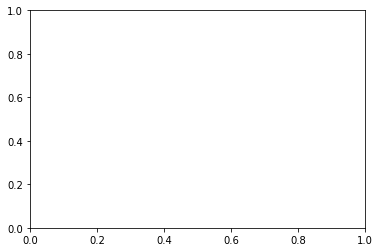

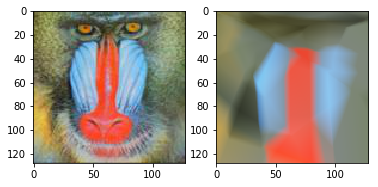

(0.0, 1.0, 0.0, 1.0)

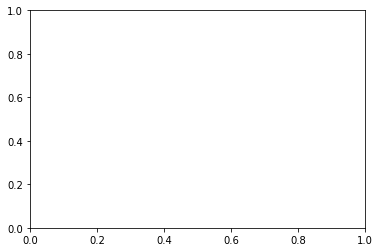

In [181]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Input, Embedding, LSTM, Dense
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import math


def psnr(original, contrast): # RGB
    
    [width,height,color]=original.shape
    #error = []
    error=np.zeros((width,height,color),dtype=int) # uint8'

    error=(original[0:width,0:height,0:color]-contrast[0:width,0:height,0:color])**2
    
    print("                                       ") # 分隔線
    print("------psnr(original, contrast)---------") # 分隔線
    print("error.info & error[0,0:3,:]=",error.dtype,error.shape,error[0,0:3,:])
    print("original[0,0:3,:]=",original[0,0:3,:])
    print("contrast[0,0:3,:]=",contrast[0,0:3,:])
    print("original[0,0:3,:]-contrast[0,0:3,:]=","error[0,0:3,:]=",original[0,0:3,:]-contrast[0,0:3,:])
    print("---------------") # 分隔線
    
    print("np.sum(error).info=",np.sum(error),"/width*height*color= ",width*height*color)
    mse=np.sum(error)/(width*height*color)
    print("255**2 = ",255**2,"& mse=" ,mse)
    print("255**2/mse=",255**2/mse)
    
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return (20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))



imF = Image.open('baboon.png')
print('imAll.shape1= ',imF.size[0], imF.size[1])
imAll=np.array(imF)  #打开图像并转化为数字矩阵
print('imAll.shape2= ',imAll.shape)

# Full Resize image 預處理
[widthA,heightA,color]=imAll.shape
resize_image = imF.resize((widthA//2, heightA//2), Image.BILINEAR)
resize_image.save("ResizeD2.png")  # 2=256 ,4=128 , 8=64 ,

#Read image
im = Image.open('ResizeD2.png')  # baboonR1010 , baboon.png
print('imog.shape= ',im.size[0], im.size[1])
imog=np.array(im)  #打开图像并转化为数字矩阵

# Resize image
k=2
[widthG,heightG,color]=imog.shape
resize_image = im.resize((widthG//k, heightG//k), Image.BILINEAR)
resize_image.save("Resize.jpg")

im2 = Image.open('Resize.jpg')
imog2=np.array(im2) 
pix = im2.load()
width = im2.size[0]
height = im2.size[1]
print('Resize.jpg= k ',k,im2.size[0], im2.size[1] )

fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(im2)
plt.show()
plt.axis('on')

m=2
n=3
xyLable=np.empty(shape=[0, m])
rgbLable=np.empty(shape=[0, n])
nom=255
for x in range(width):
    for y in range(height):
        r, g, b = pix[x, y]
        xy = np.array([[x, y]], np.int)
        rgb = np.array([[r, g , b]], np.int)

        xyLable =np.vstack((xyLable, xy))
        rgbLable=np.vstack((rgbLable, rgb))
#        print(x)

xyLable.shape

print("xyLable.shape",xyLable.shape)
print("rgbLable.shape",rgbLable.shape)

print('xyLable[0:3]=',xyLable[0:3])
print('rgbLable[0:3]=',rgbLable[0:3])

index = [i for i in range(len(xyLable))]
np.random.shuffle(index)
data = xyLable[index]
label = rgbLable[index]


v=im2.size[0]*im2.size[1]
x_train=data[0:v] #
# x_test=data[30000:]   #

y_train=label[0:v] #
# y_test=label[30000:]   #
print('x_train.shape,y_train.shape)= ',x_train.shape,y_train.shape)
print('x_test.shape,y_test.shape)= ',x_test.shape,y_test.shape)
#
# ################################# _mlp.py


y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

y_train /= 255
y_test /= 255

print(x_train.shape[0], '= X train samples')
print(x_test.shape[0], '= X test samples')

print(y_train.shape,'y train samples')

print('x_train[:3] =',x_train[0:3])
print('y_train[:3] =',y_train[0:3])

print('len(y_train)= ',len(y_train))
#
# convert class vectors to binary class matrices
# 線性迴歸分析模型預測
print(y_train.shape, 'categorical after')

model = Sequential()
model.add(Dense(units=10, # hide=10
                activation='relu',
                kernel_initializer='normal',
                input_shape=(2,)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='sigmoid'))

model.summary()

# print(model.summary())

epochs=5000
model.compile(loss='mse',       # categorical_crossentropy' , mse
              optimizer=RMSprop(lr=0.0001, rho=0.9, epsilon=1e-08, decay=0.0),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_train, y_train))


aa = np.array([[1, 1.5]], np.float)
bb = np.array([[0, 0.5]], np.float)

# cc =np.vstack((aa, bb))
# RGB = model.predict(cc)
# print(RGB)

xyInput=np.empty(shape=[0, m])
rgbPredict=np.empty(shape=[0, n])

k=1
# g=np.empty((width*k,height*k),3)
for x in range(width*k):
    for y in range(height*k):
        xinp = (x//k) + (x % k) / k
        yinp = (y//k) + (y % k) / k
        xy = np.array([[xinp, yinp]], np.float)
        xyInput = np.vstack((xyInput, xy))

print("k & width & height= ",k,width,height)
print("xyInput[:5]",xyInput[:5])
print('xyInput.shape',xyInput.shape)


# f= model.predict(xyInput)
# print(" f shape & model.predict",f.shape,f[:5])


# 模型的save model
import h5py
print("Saving model to disk C:\pythonwork")
# mp = "C:\pythonwork"
# model.save(mp)
model.save('baboonD8e5k_model.h5') # E://logs/iris_model.h5
# model.save="C:\pythonwork/VbaboonD4e5k_model.h5"


# 模型的載入及使用
from keras.models import load_model
print("Using loaded model to predict...C:\pythonwork/baboonD2e5k_model.h5")
#load_model = load_model("TbaboonD4e5k_model.h5")

# load_model = load_model("C:\pythonwork/baboonD8e5k_model.h5")
# predicted = load_model.predict(xyInput)

predicted= model.predict(xyInput)
print("\nPredicted softmax vector is: predicted.shape,predicted[0:3]=")
print(predicted.shape,predicted[0:3])

predicted=np.reshape(predicted, (width*k,height*k, 3), order='F')  # C ,F imog2
predicted *= 255//1
print("shape & predicted[0,0:3,:]= ",predicted.shape,predicted[0,0:3,:])
print("shape & imog2[0,0:3,:]= ",imog2.shape,imog2[0,0:3,:])
p_rgbLable=predicted.astype(int) # 'uint8'



# PIL=Image.fromarray(rgbLable)

print("p_rgbLable.Bicubic",p_rgbLable.dtype,p_rgbLable.shape,p_rgbLable[0,0:3,:])
print("rgbLable.oriang",rgbLable.dtype,rgbLable.shape,rgbLable[0:3])


# PIL.save( "InterBaboonE5k_D2-T.png", "PNG" )
# im3 = Image.open('InterBaboonE5k_D2-T.png')
# im3Arr=np.array(im3)  #打开图像并转化为数字矩阵

d=psnr(imog2,p_rgbLable)
print("PSNR",d)


fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(im2)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(p_rgbLable)
plt.show()
plt.axis('on')

In [2]:
def psnr(original, contrast): # RGB
    
    [width,height,color]=original.shape
    #error = []
    error=np.zeros((width,height,color),dtype=int) # uint8'

    error=(original[0:width,0:height,0:color]-contrast[0:width,0:height,0:color])**2
    
    print("                                       ") # 分隔線
    print("------psnr(original, contrast)---------") # 分隔線
    print("error.info & error[0,0:3,:]=",error.dtype,error.shape,error[0,0:3,:])
    print("original[0,0:3,:]=",original[0,0:3,:])
    print("contrast[0,0:3,:]=",contrast[0,0:3,:])
    print("original[0,0:3,:]-contrast[0,0:3,:]=","error[0,0:3,:]=",original[0,0:3,:]-contrast[0,0:3,:])
    print("---------------") # 分隔線
    
    print("np.sum(error).info=",np.sum(error),"/width*height*color= ",width*height*color)
    mse=np.sum(error)/(width*height*color)
    print("255**2 = ",255**2,"& mse=" ,mse)
    print("255**2/mse=",255**2/mse)
    
    if mse == 0:
     return 100
    PIXEL_MAX = 255.0
    return (20 * math.log10(PIXEL_MAX))-(10 * math.log10(mse))
    

    
import h5py
    

im = Image.open( "Resize.jpg" )
original=np.array(im)  #打开图像并转化为数字矩阵

m=2
xyInput=np.empty(shape=[0, m])

k=1 ; width=128;  height=128
# g=np.empty((width*k,height*k),3)
for x in range(width*k):
    for y in range(height*k):
        xinp = (x//k) + (x % k) / k
        yinp = (y//k) + (y % k) / k
        xy = np.array([[xinp, yinp]], np.float)
        xyInput = np.vstack((xyInput, xy))

# f = h5py.File('C:\pythonwork/baboonD8e5k_model.h5', 'r') # baboonD4e5k_model.h5
# list(f.keys())

load_model = load_model("C:\pythonwork/baboonD8e5k_model.h5")

predictedR = load_model.predict(xyInput)
print("\nPredicted softmax vector is: predicted.shape,predicted[0:3] = ")
print(predictedR.shape,predictedR[0:3])


predictedR=np.reshape(predictedR, (width*k,height*k, 3), order='F')  # C ,F
predictedR *= 255//1
print("shape & predictedR[0,0:3,:]=",predictedR.shape,predictedR[0,0:3,:])
print("shape & original[0,0:3,:]=",original.shape,original[0,0:3,:])
p_rgbLable=predictedR.astype(int) # 'uint8'
# original=original.astype(float) # 'uint8'

e=psnr(original,p_rgbLable) #  p_rgbLable
print("psnr=",e)



fig, ax = plt.subplots(nrows=1, ncols=2)
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(p_rgbLable)
plt.show()
plt.axis('on')


NameError: name 'Image' is not defined

In [4]:
# Import `datasets` from `sklearn`
from sklearn import datasets

# Load in the `digits` data
digits = datasets.load_digits()

# Print the `digits` data 
print(digits)

# Get the keys of the `digits` data
print(digits.keys())

# Print out the data
print(digits.data)

# Print out the target values
print(digits.target)

# Print out the description of the `digits` data
print(digits.DESCR)


{'DESCR': ".. _digits_dataset:\n\nOptical recognition of handwritten digits dataset\n--------------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 5620\n    :Number of Attributes: 64\n    :Attribute Information: 8x8 image of integer pixels in the range 0..16.\n    :Missing Attribute Values: None\n    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)\n    :Date: July; 1998\n\nThis is a copy of the test set of the UCI ML hand-written digits datasets\nhttp://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits\n\nThe data set contains images of hand-written digits: 10 classes where\neach class refers to a digit.\n\nPreprocessing programs made available by NIST were used to extract\nnormalized bitmaps of handwritten digits from a preprinted form. From a\ntotal of 43 people, 30 contributed to the training set and different 13\nto the test set. 32x32 bitmaps are divided into nonoverlapping blocks of\n4x4 and the number of

In [2]:
from sklearn import datasets

In [5]:
iris = datasets.load_iris()
iris 

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [7]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
print(iris['data'])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [10]:
print(iris['feature_names'])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [11]:
import pandas as pd

In [12]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [13]:
y = pd.DataFrame(iris['target'], columns=['target_names'])
y

,target_names
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [14]:
data = pd.concat([x,y], axis=1)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_names
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [15]:
# Import the `pandas` library as `pd`
# import pandas as pd

# Load in the data with `read_csv()`
digits = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/optdigits/optdigits.tra", header=None)

# Print out `digits`
print(digits)

      0   1   2   3   4   5   6   7   8   9  ...  55  56  57  58  59  60  61  \
0      0   1   6  15  12   1   0   0   0   7 ...   0   0   0   6  14   7   1   
1      0   0  10  16   6   0   0   0   0   7 ...   0   0   0  10  16  15   3   
2      0   0   8  15  16  13   0   0   0   1 ...   0   0   0   9  14   0   0   
3      0   0   0   3  11  16   0   0   0   0 ...   0   0   0   0   1  15   2   
4      0   0   5  14   4   0   0   0   0   0 ...   0   0   0   4  12  14   7   
5      0   0  11  16  10   1   0   0   0   4 ...   3   0   0  10  16  16  16   
6      0   0   1  11  13  11   7   0   0   0 ...   0   0   0   1  13   5   0   
7      0   0   8  10   8   7   2   0   0   1 ...   0   0   0   4  13   8   0   
8      0   0  15   2  14  13   2   0   0   0 ...   0   0   0  10  12   5   0   
9      0   0   3  13  13   2   0   0   0   6 ...   0   0   0   3  15  11   6   
10     0   0   6  14  14  16  16   8   0   0 ...   0   0   0  10  12   0   0   
11     0   0   0   3  16  11   1   0   0